In [1]:
import pandas as pd
from darts import TimeSeries

In [2]:
# Read a pandas DataFrame
#df = pd.read_csv("C:\jintu\Formated data_resampled 1H ID1\six months.csv")
df = pd.read_csv("MY3_May_2023_KNN_Imputed.csv")

df

,Datetime,id,field1,field2,field3,field4,field5,field6,field7,field8
0,2022-07-03 20:30:00,2.200000e+01,8.871990,0.000000,398.496241,3.636364,26.00000,71.000000,45.666667,55.000000
1,2022-07-03 20:45:00,6.700000e+01,3.802281,0.000000,229.323308,0.000000,25.00000,62.000000,44.666667,53.333333
2,2022-07-03 21:00:00,1.120000e+02,12.674271,0.000000,184.210526,0.000000,25.00000,60.000000,43.666667,52.750000
3,2022-07-03 21:15:00,1.560000e+02,16.476553,0.000000,165.413534,0.000000,24.00000,59.666667,43.333333,52.666667
4,2022-07-03 21:30:00,5.307278e+05,321.540266,190.816359,794.429588,371.997558,27.25921,61.186420,18.749892,20.904609
...,...,...,...,...,...,...,...,...,...,...
28042,2023-04-21 23:00:00,1.061851e+06,397.944200,225.108225,700.960219,489.898990,29.00000,69.000000,27.666667,29.000000
28043,2023-04-21 23:15:00,1.061896e+06,392.070485,225.974026,707.818930,492.424242,29.00000,69.000000,31.666667,36.000000
28044,2023-04-21 23:30:00,1.061941e+06,393.538913,225.974026,716.049383,493.686869,29.00000,70.000000,33.333333,39.333333
28045,2023-04-21 23:45:00,1.061986e+06,392.070485,225.108225,727.023320,488.636364,29.00000,70.000000,35.333333,42.666667


In [3]:
df1 = df
df1['Datetime'] = pd.to_datetime(df['Datetime'])

df1 = df.set_index('Datetime')
#df1
df2=df1.resample('1H').mean()
df2.reset_index(inplace = True)
df2.head()

,Datetime,id,field1,field2,field3,field4,field5,field6,field7,field8
0,2022-07-03 20:00:00,44.500000,6.337136,0.000000,313.909774,1.818182,25.500000,66.500000,45.166667,54.166667
1,2022-07-03 21:00:00,265430.890775,168.057839,95.408180,484.620809,185.998779,25.879605,60.509877,31.124946,36.806471
2,2022-07-03 22:00:00,530727.781549,321.540266,190.816359,794.429588,371.997558,27.259210,61.186420,18.749892,20.904609
3,2022-07-03 23:00:00,530727.781549,321.540266,190.816359,794.429588,371.997558,27.259210,61.186420,18.749892,20.904609
4,2022-07-04 00:00:00,530727.781549,321.540266,190.816359,794.429588,371.997558,27.259210,61.186420,18.749892,20.904609


In [4]:
df = df2

target1 = 'field1'
test_l = 168
train_l = len(df) - test_l
date = 'Datetime'
# Create a TimeSeries, specifying the time and value columns
series1 = TimeSeries.from_dataframe(df, date, target1)

# Set aside the last 24 hours as a validation series
train1, val1 = series1[:train_l], series1[train_l:]

target2 = 'field2'
test_l = 168
train_l = len(df) - test_l

# Create a TimeSeries, specifying the time and value columns
series2 = TimeSeries.from_dataframe(df, date, target2)

# Set aside the last 24 hours as a validation series
train2, val2 = series2[:train_l], series2[train_l:]

target3 = 'field3'
test_l = 168
train_l = len(df) - test_l

# Create a TimeSeries, specifying the time and value columns
series3 = TimeSeries.from_dataframe(df, date, target3)

# Set aside the last 24 hours as a validation series
train3, val3 = series3[:train_l], series3[train_l:]

target4 = 'field4'
test_l = 168
train_l = len(df) - test_l

# Create a TimeSeries, specifying the time and value columns
series4 = TimeSeries.from_dataframe(df, date, target4)

# Set aside the last 24 hours as a validation series
train4, val4 = series4[:train_l], series4[train_l:]

target7 = 'field7'
test_l = 168
train_l = len(df) - test_l

# Create a TimeSeries, specifying the time and value columns
series7 = TimeSeries.from_dataframe(df, date, target7)

# Set aside the last 24 hours as a validation series
train7, val7 = series7[:train_l], series7[train_l:]

target8 = 'field8'
test_l = 168
train_l = len(df) - test_l

# Create a TimeSeries, specifying the time and value columns
series8 = TimeSeries.from_dataframe(df, date, target8)

# Set aside the last 24 hours as a validation series
train8, val8 = series8[:train_l], series8[train_l:]

# Linear Regression model

In [5]:
# # importing model
# from darts.models import LinearRegressionModel

# # creating a model object
# modellrm1 = LinearRegressionModel(lags=96, output_chunk_length=24)
# # fitting the model
# modellrm1.fit(train1)

# # imports
# from darts.metrics import mape
# predlrm1 = modellrm1.predict(n = len(val1), series = train1)
# # print("Mape = {:.2f}%".format(mape(train1 , predlrm1)))


# modellrm2 = LinearRegressionModel(lags=96, output_chunk_length=24)
# modellrm2.fit(train2)
# predlrm2 = modellrm2.predict(n = len(val2), series = train2)

# modellrm3 = LinearRegressionModel(lags=96, output_chunk_length=24)
# modellrm3.fit(train3)
# predlrm3 = modellrm3.predict(n = len(val3), series = train3)

# modellrm4 = LinearRegressionModel(lags=96, output_chunk_length=24)
# modellrm4.fit(train4)
# predlrm4 = modellrm4.predict(n = len(val4), series = train4)

# modellrm7 = LinearRegressionModel(lags=96, output_chunk_length=24)
# modellrm7.fit(train7)
# predlrm7 = modellrm7.predict(n = len(val7), series = train7)

# modellrm8 = LinearRegressionModel(lags=96, output_chunk_length=24)
# modellrm8.fit(train8)
# predlrm8 = modellrm8.predict(n = len(val8), series = train8)

In [6]:
import pandas as pd
from darts.metrics import rmse, mae
from darts.models import LinearRegressionModel

# Create a list to store the predictions
predictions = []

# Train and predict for target1
modellrm1 = LinearRegressionModel(lags=96, output_chunk_length=24)
modellrm1.fit(train1)
predlrm1 = modellrm1.predict(n=len(val1), series=train1)
predictions.append(predlrm1)

# Train and predict for target2
modellrm2 = LinearRegressionModel(lags=96, output_chunk_length=24)
modellrm2.fit(train2)
predlrm2 = modellrm2.predict(n=len(val2), series=train2)
predictions.append(predlrm2)

# Train and predict for target3
modellrm3 = LinearRegressionModel(lags=96, output_chunk_length=24)
modellrm3.fit(train3)
predlrm3 = modellrm3.predict(n=len(val3), series=train3)
predictions.append(predlrm3)

# Train and predict for target4
modellrm4 = LinearRegressionModel(lags=96, output_chunk_length=24)
modellrm4.fit(train4)
predlrm4 = modellrm4.predict(n=len(val4), series=train4)
predictions.append(predlrm4)

# Train and predict for target7
modellrm7 = LinearRegressionModel(lags=96, output_chunk_length=24)
modellrm7.fit(train7)
predlrm7 = modellrm7.predict(n=len(val7), series=train7)
predictions.append(predlrm7)

# Train and predict for target8
modellrm8 = LinearRegressionModel(lags=96, output_chunk_length=24)
modellrm8.fit(train8)
predlrm8 = modellrm8.predict(n=len(val8), series=train8)
predictions.append(predlrm8)

# Calculate RMSE and MAE for each target
rmse_scores = [rmse(pred, val) for pred, val in zip(predictions, [val1, val2, val3, val4, val7, val8])]
mae_scores = [mae(pred, val) for pred, val in zip(predictions, [val1, val2, val3, val4, val7, val8])]

# Create a DataFrame to store the results
results = pd.DataFrame({
    'Target': ['target1', 'target2', 'target3', 'target4', 'target7', 'target8'],
    'RMSE': rmse_scores,
    'MAE': mae_scores
})

# Save the results to a CSV file
results.to_csv('LinearRegression_error.csv', index=False)


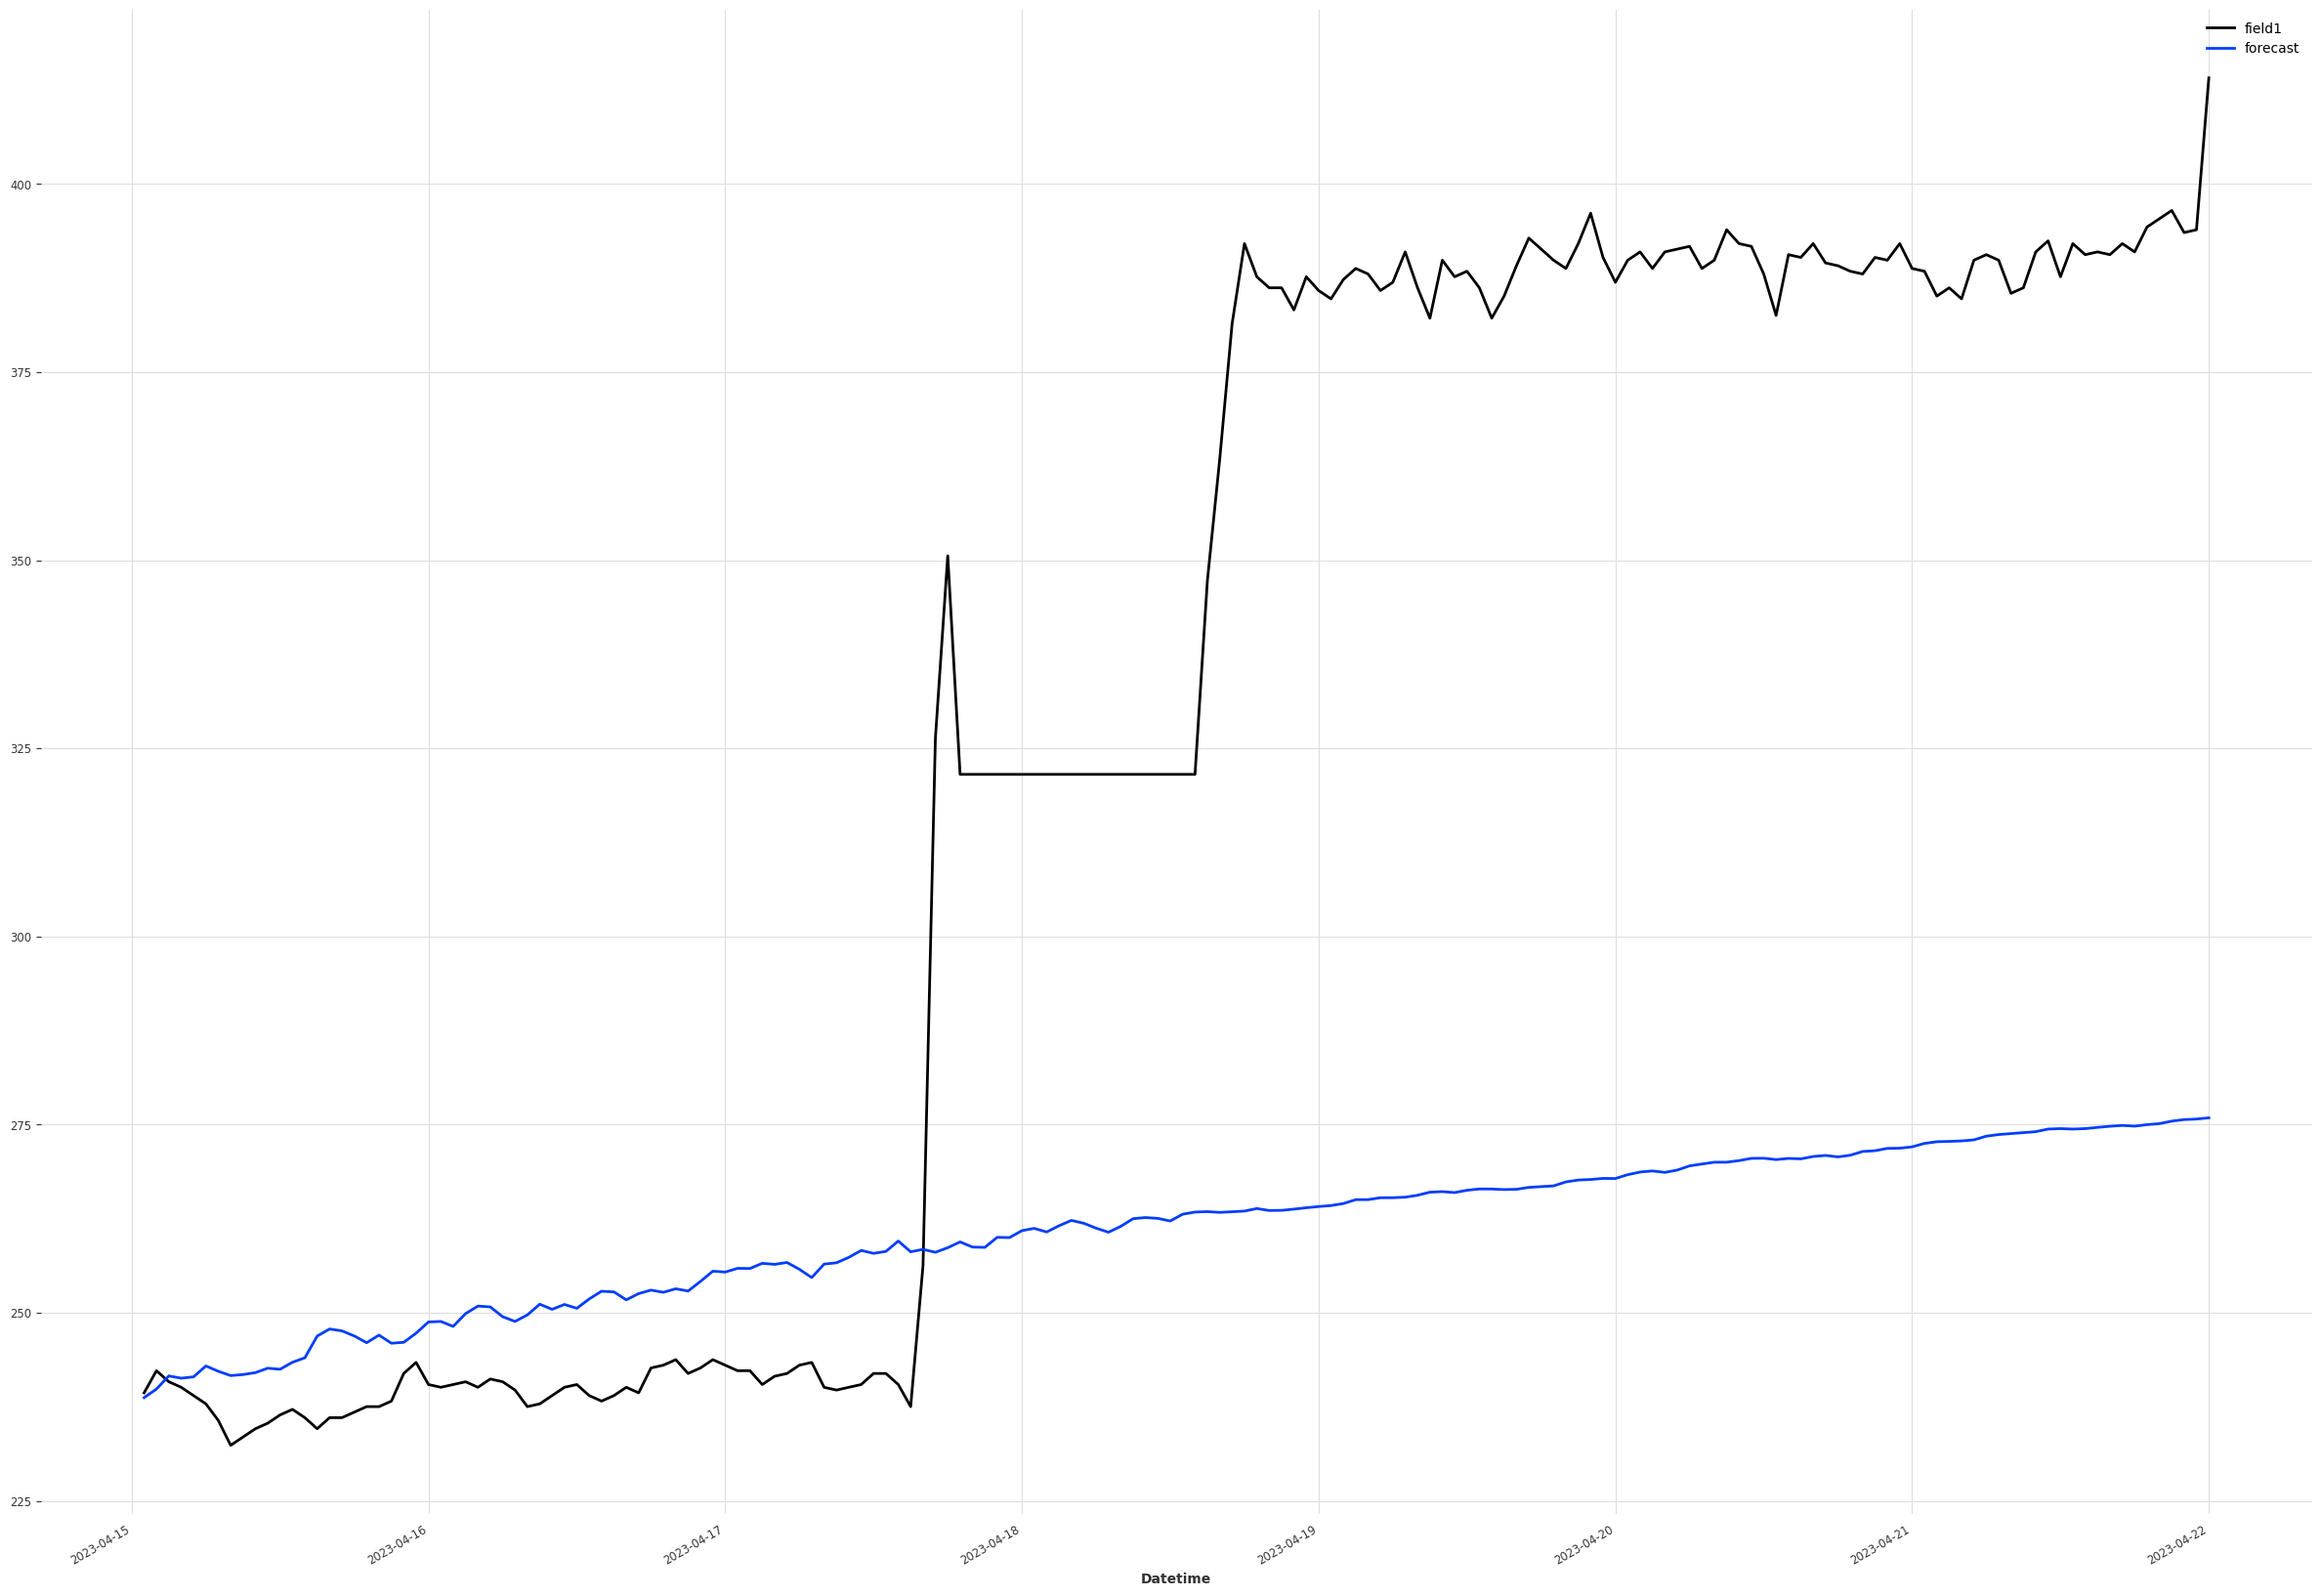

In [7]:
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

#mean_absolute_error(val,pred)
plt.rcParams['figure.figsize'] = [30, 20]
val1.plot()
predlrm1.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

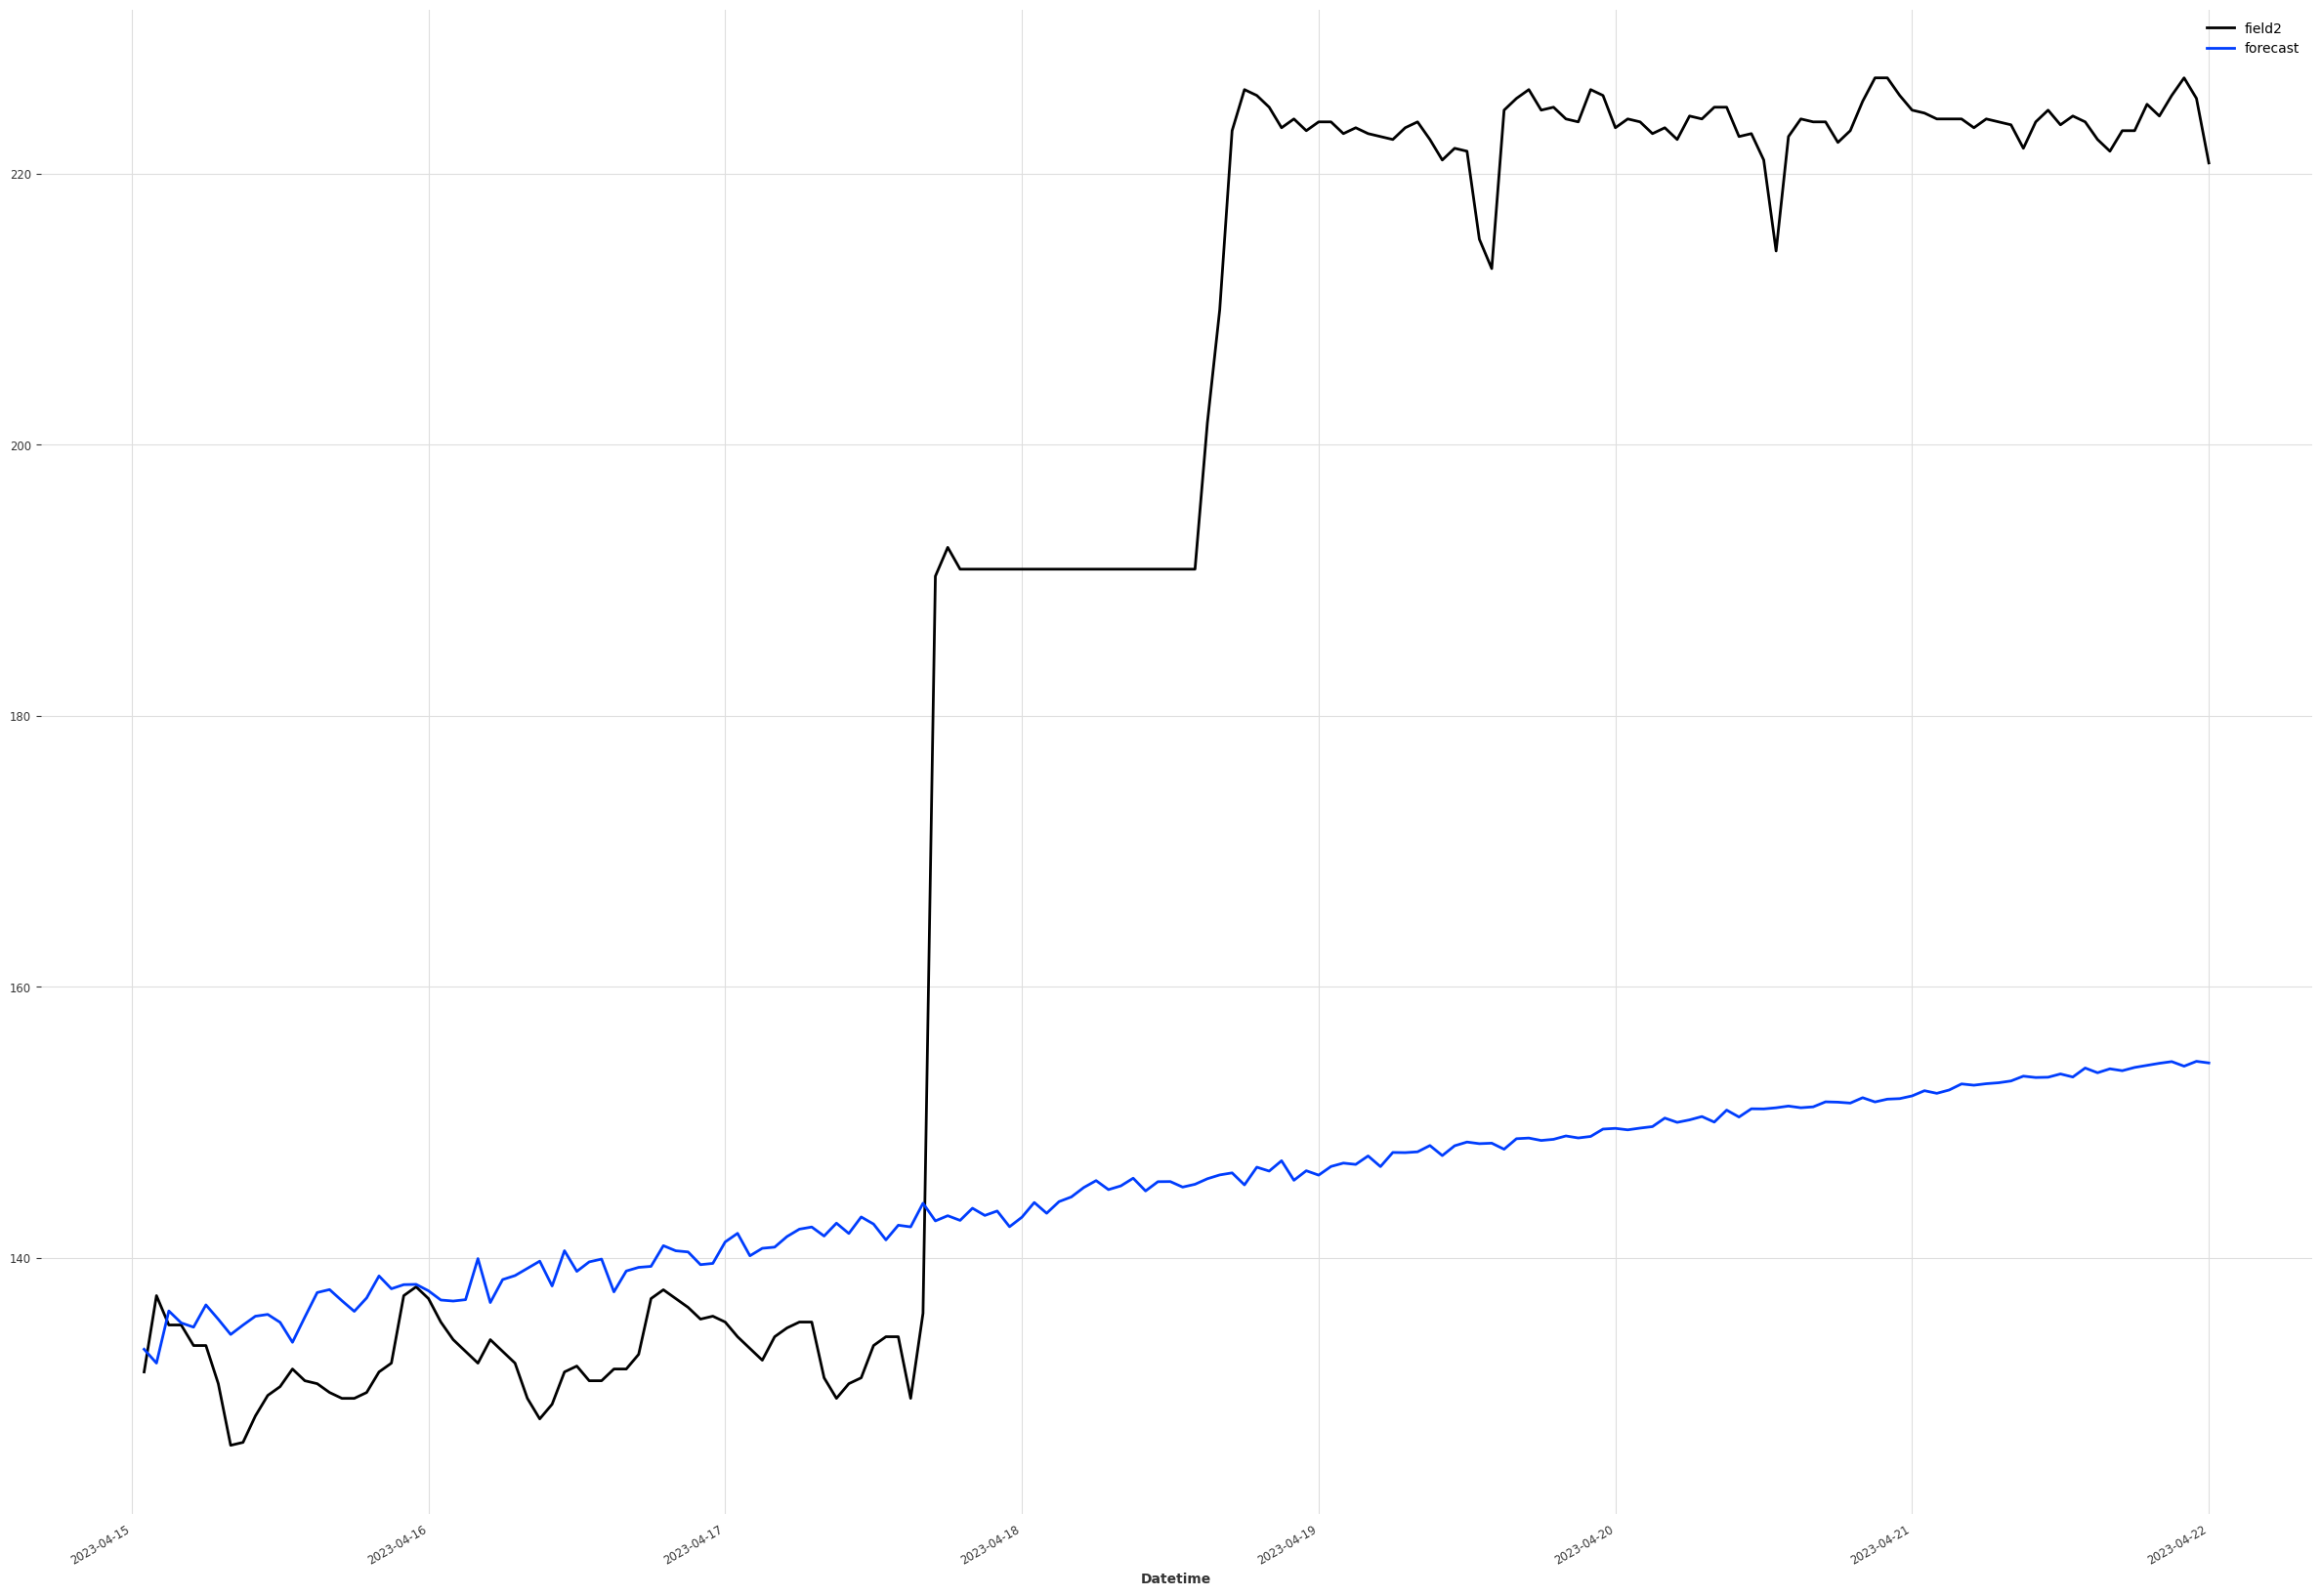

In [8]:
#mean_absolute_error(val,pred)
plt.rcParams['figure.figsize'] = [30, 20]
val2.plot()
predlrm2.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

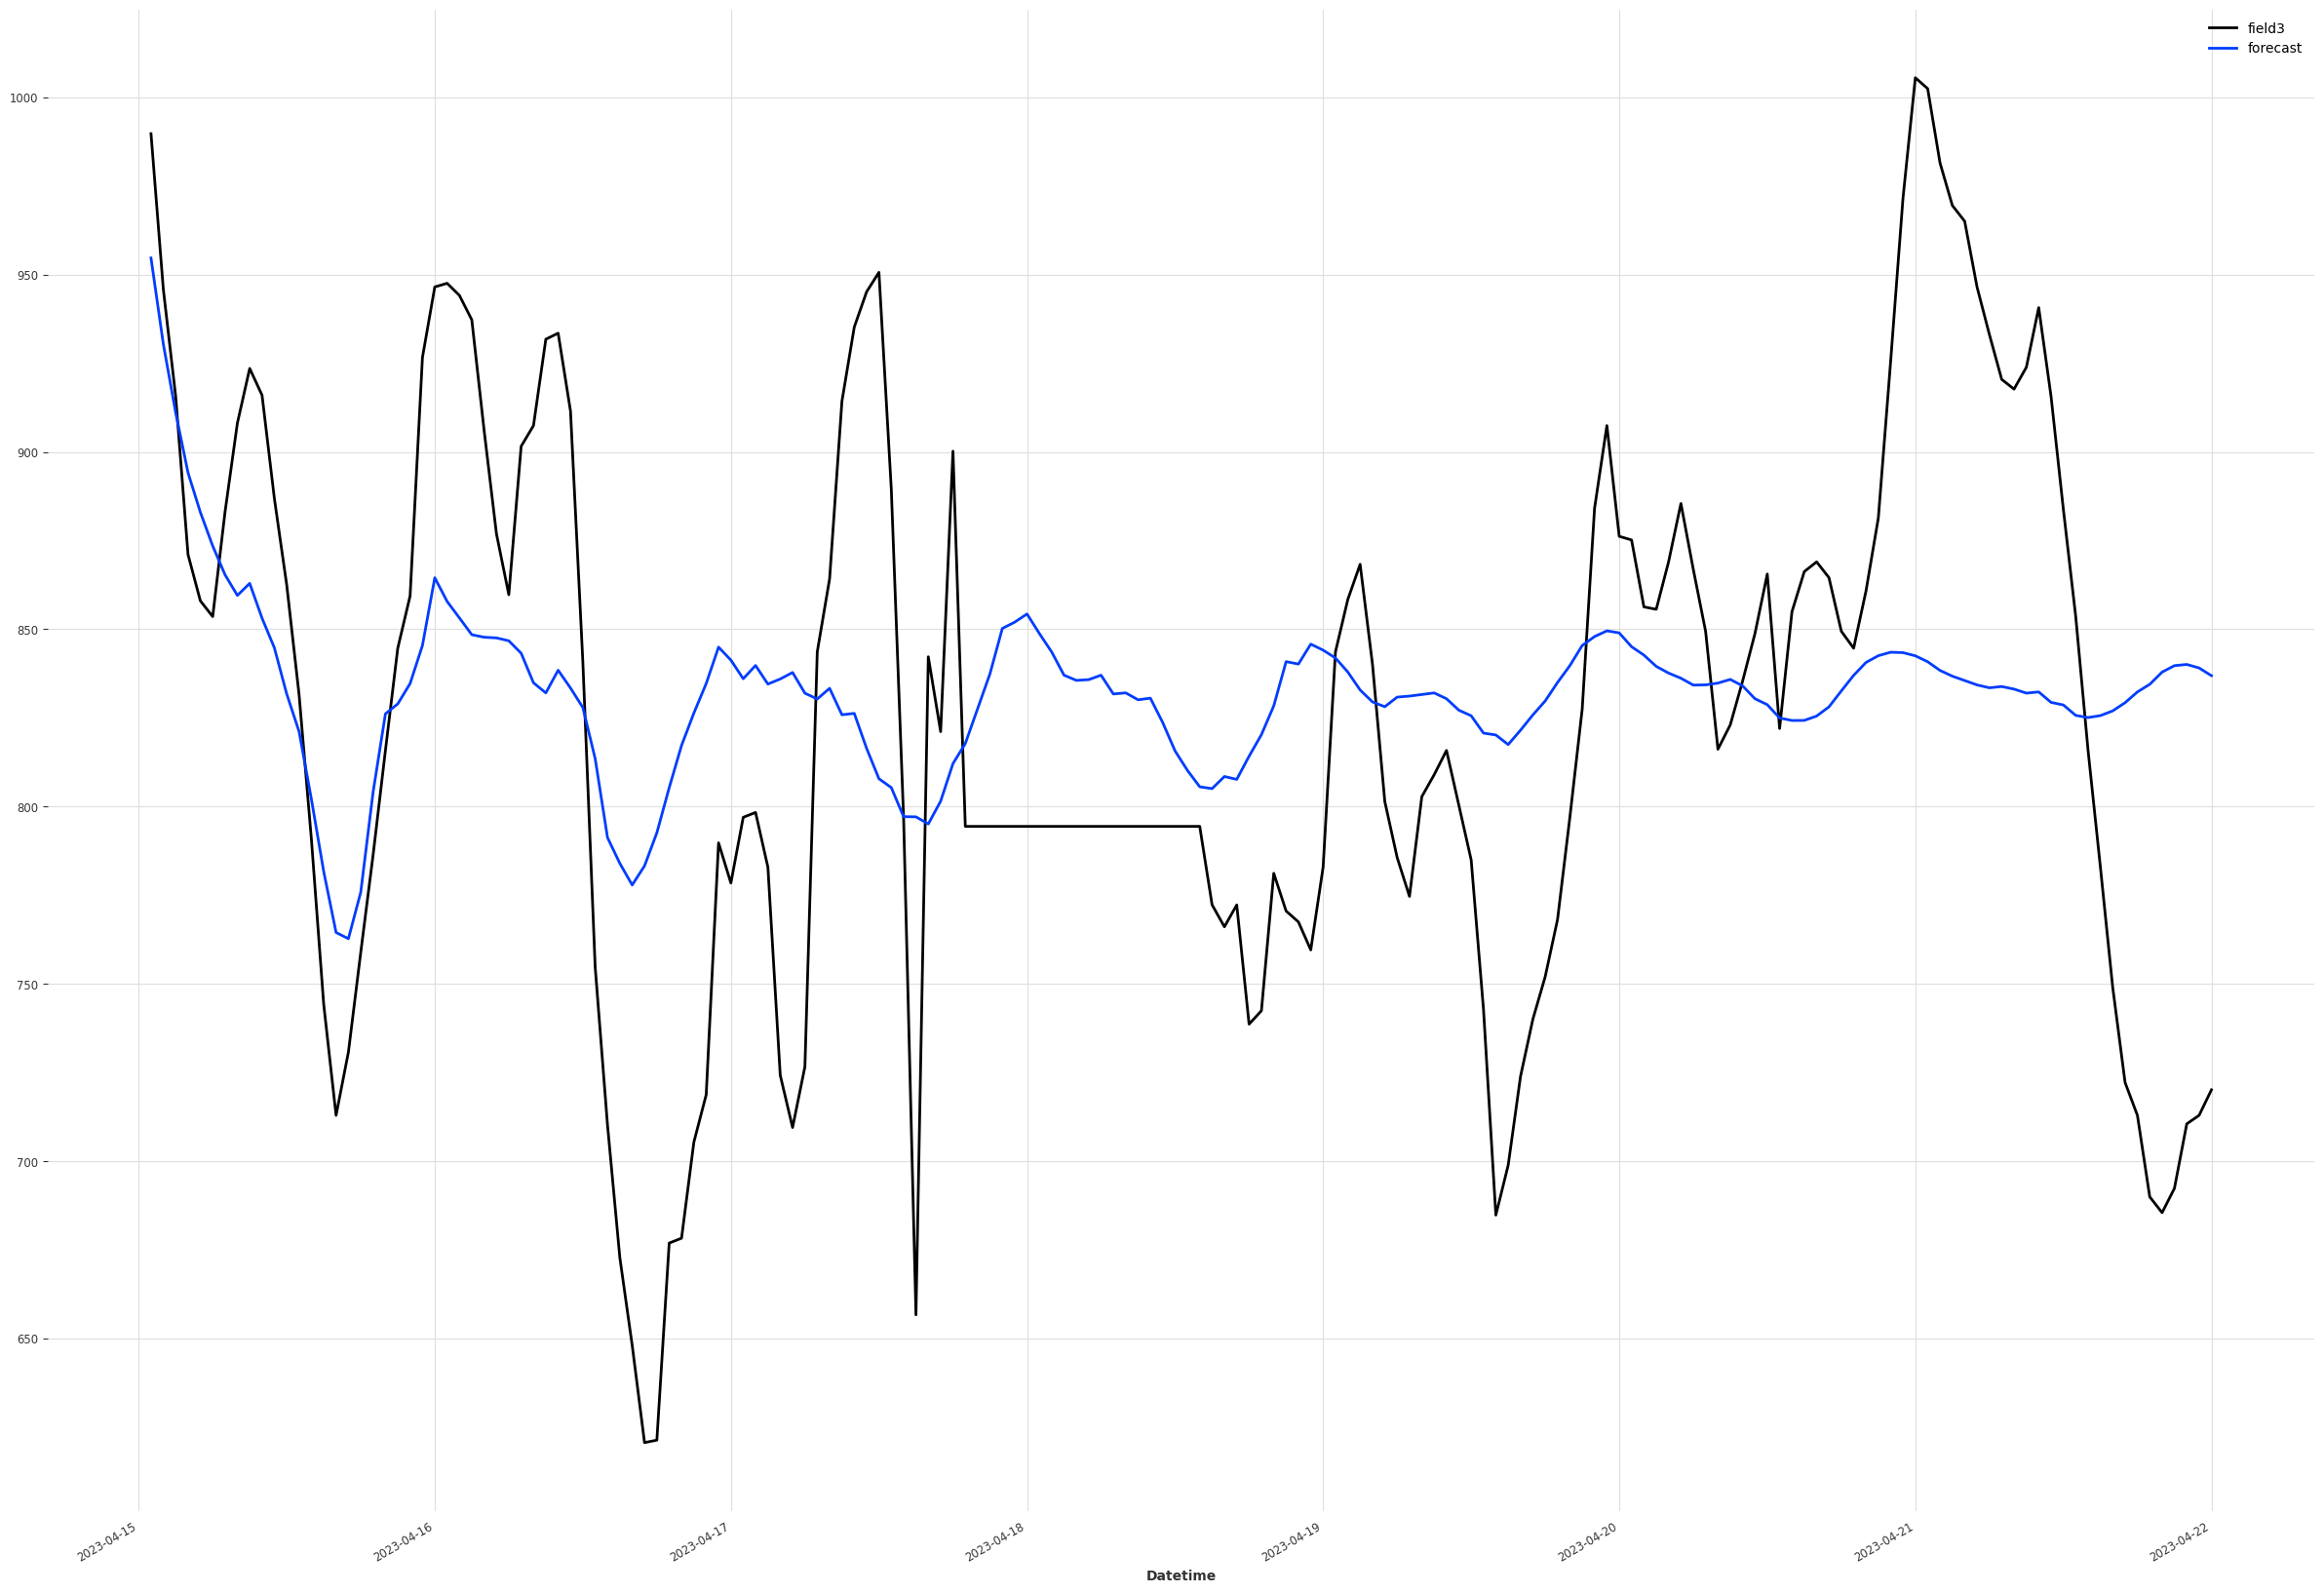

In [9]:
#mean_absolute_error(val,pred)
plt.rcParams['figure.figsize'] = [30, 20]
val3.plot()
predlrm3.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

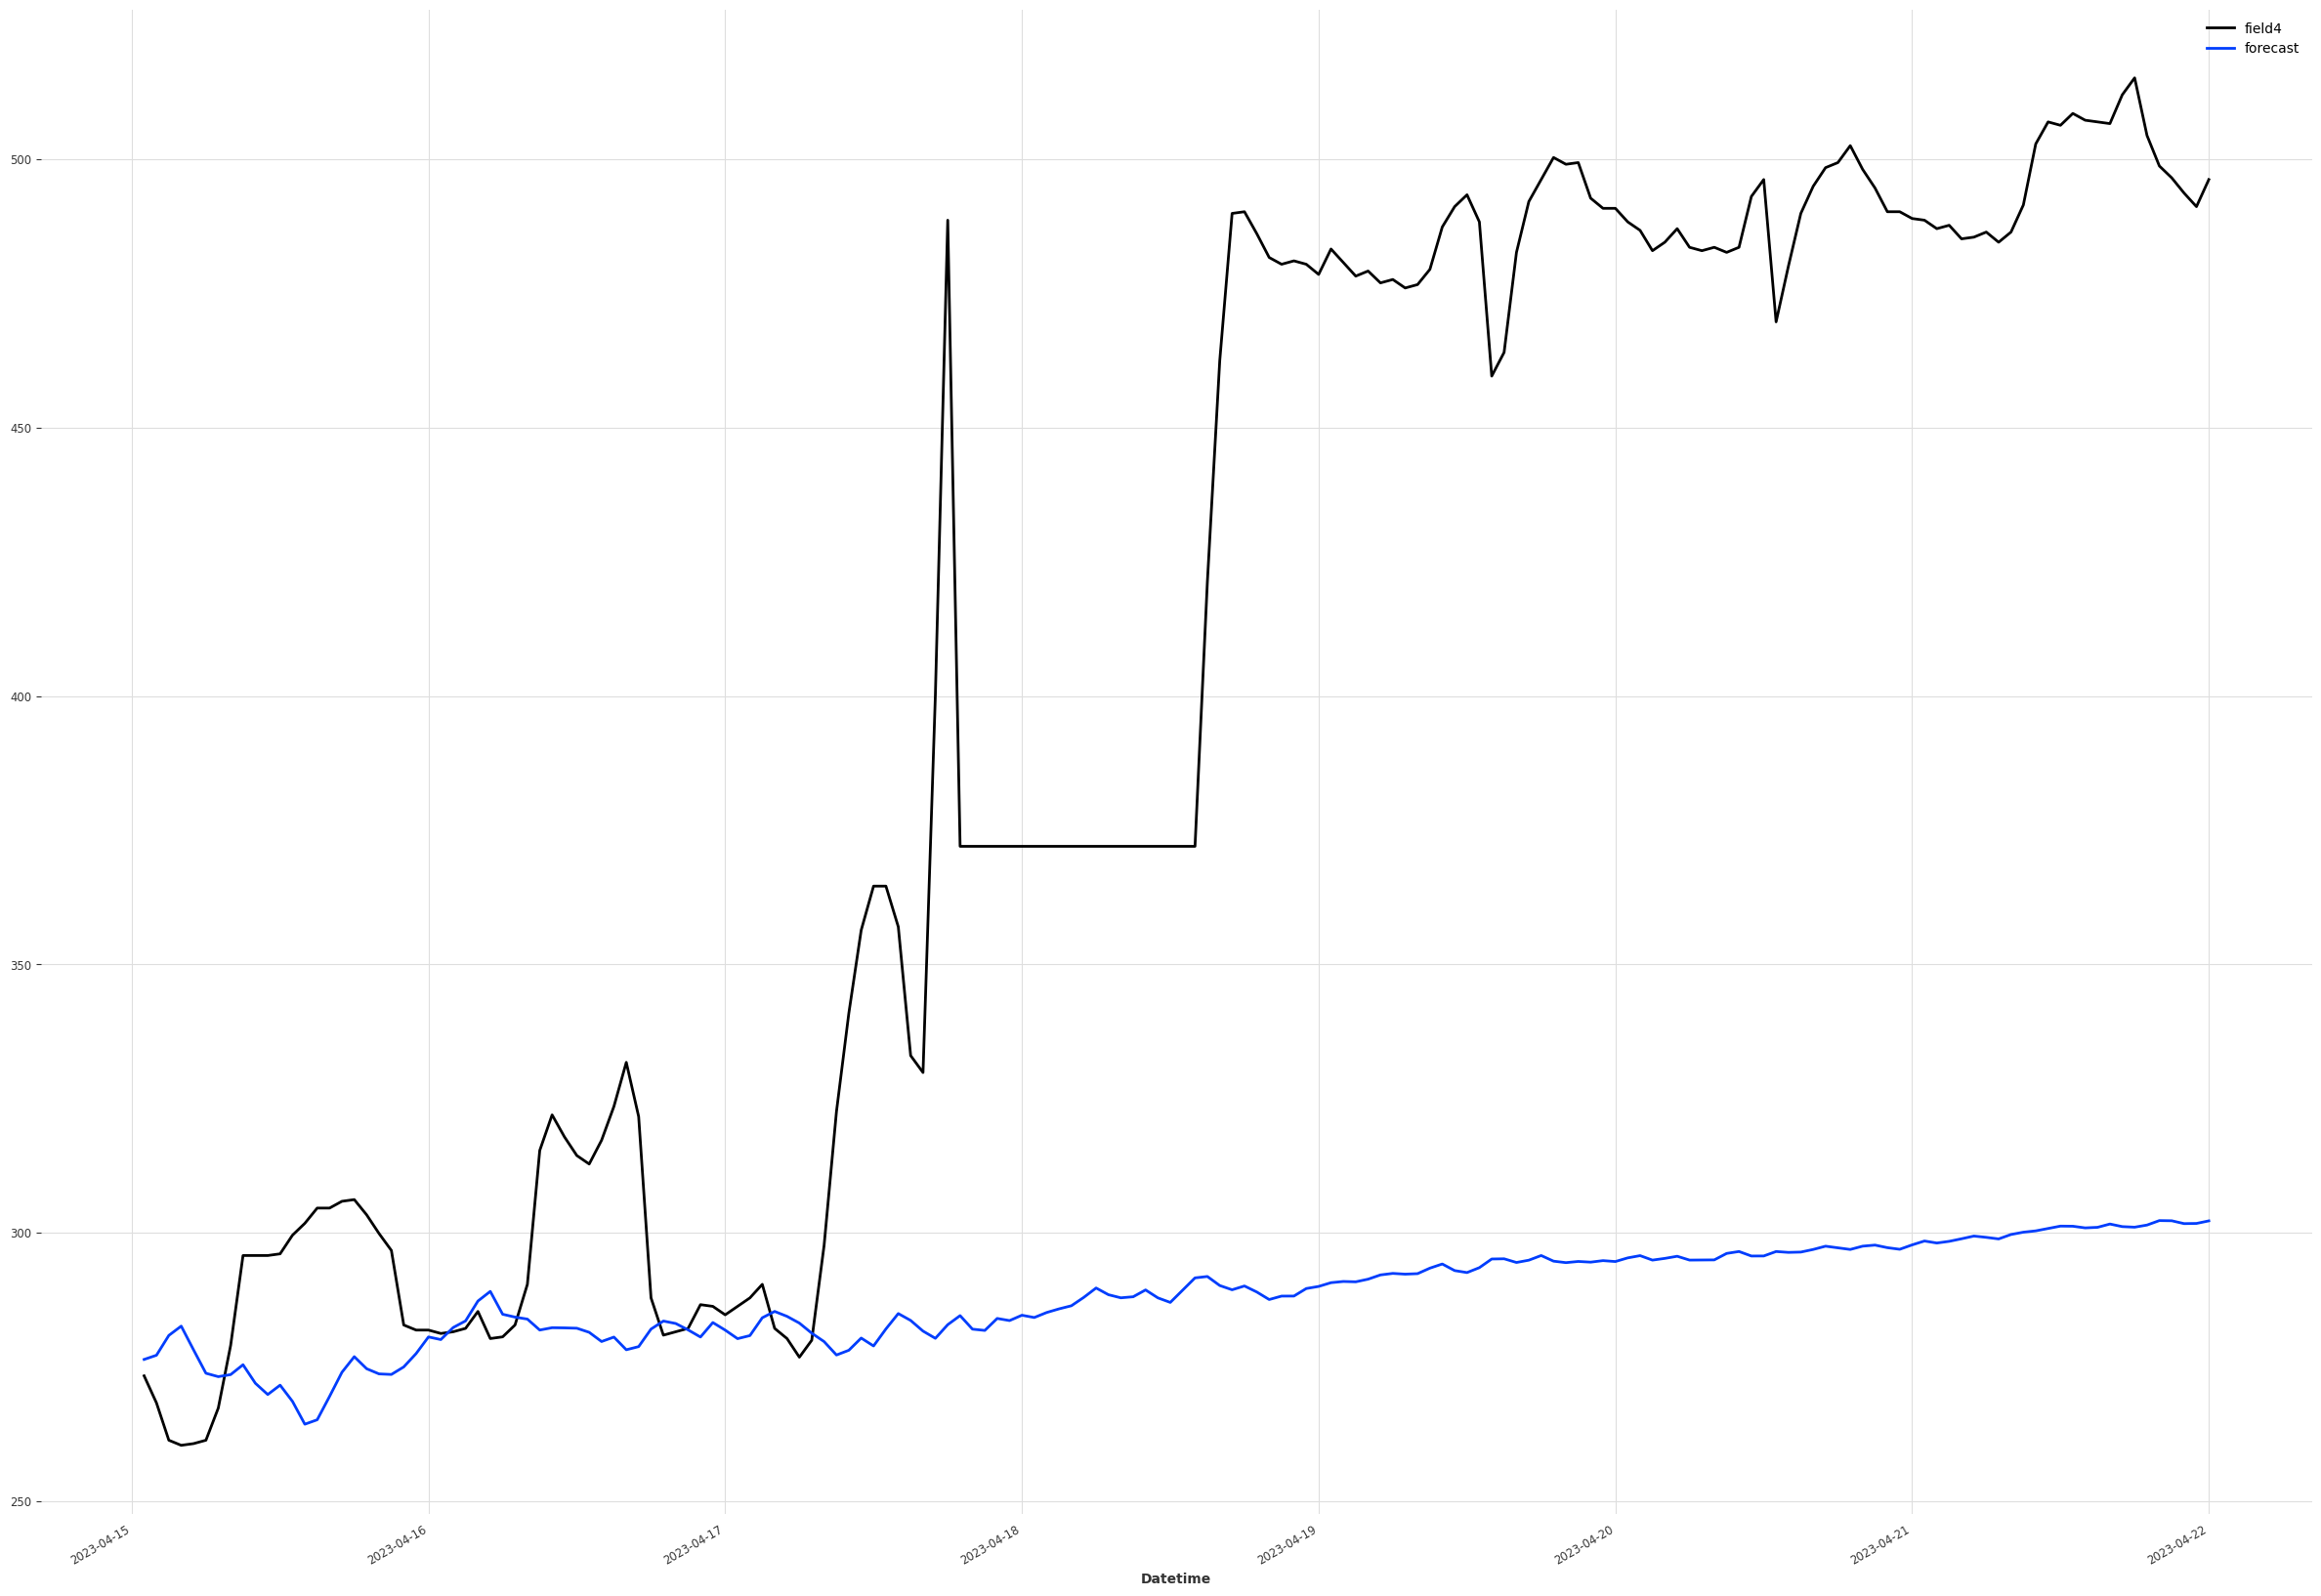

In [10]:
#mean_absolute_error(val,pred)
plt.rcParams['figure.figsize'] = [30, 20]
val4.plot()
predlrm4.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

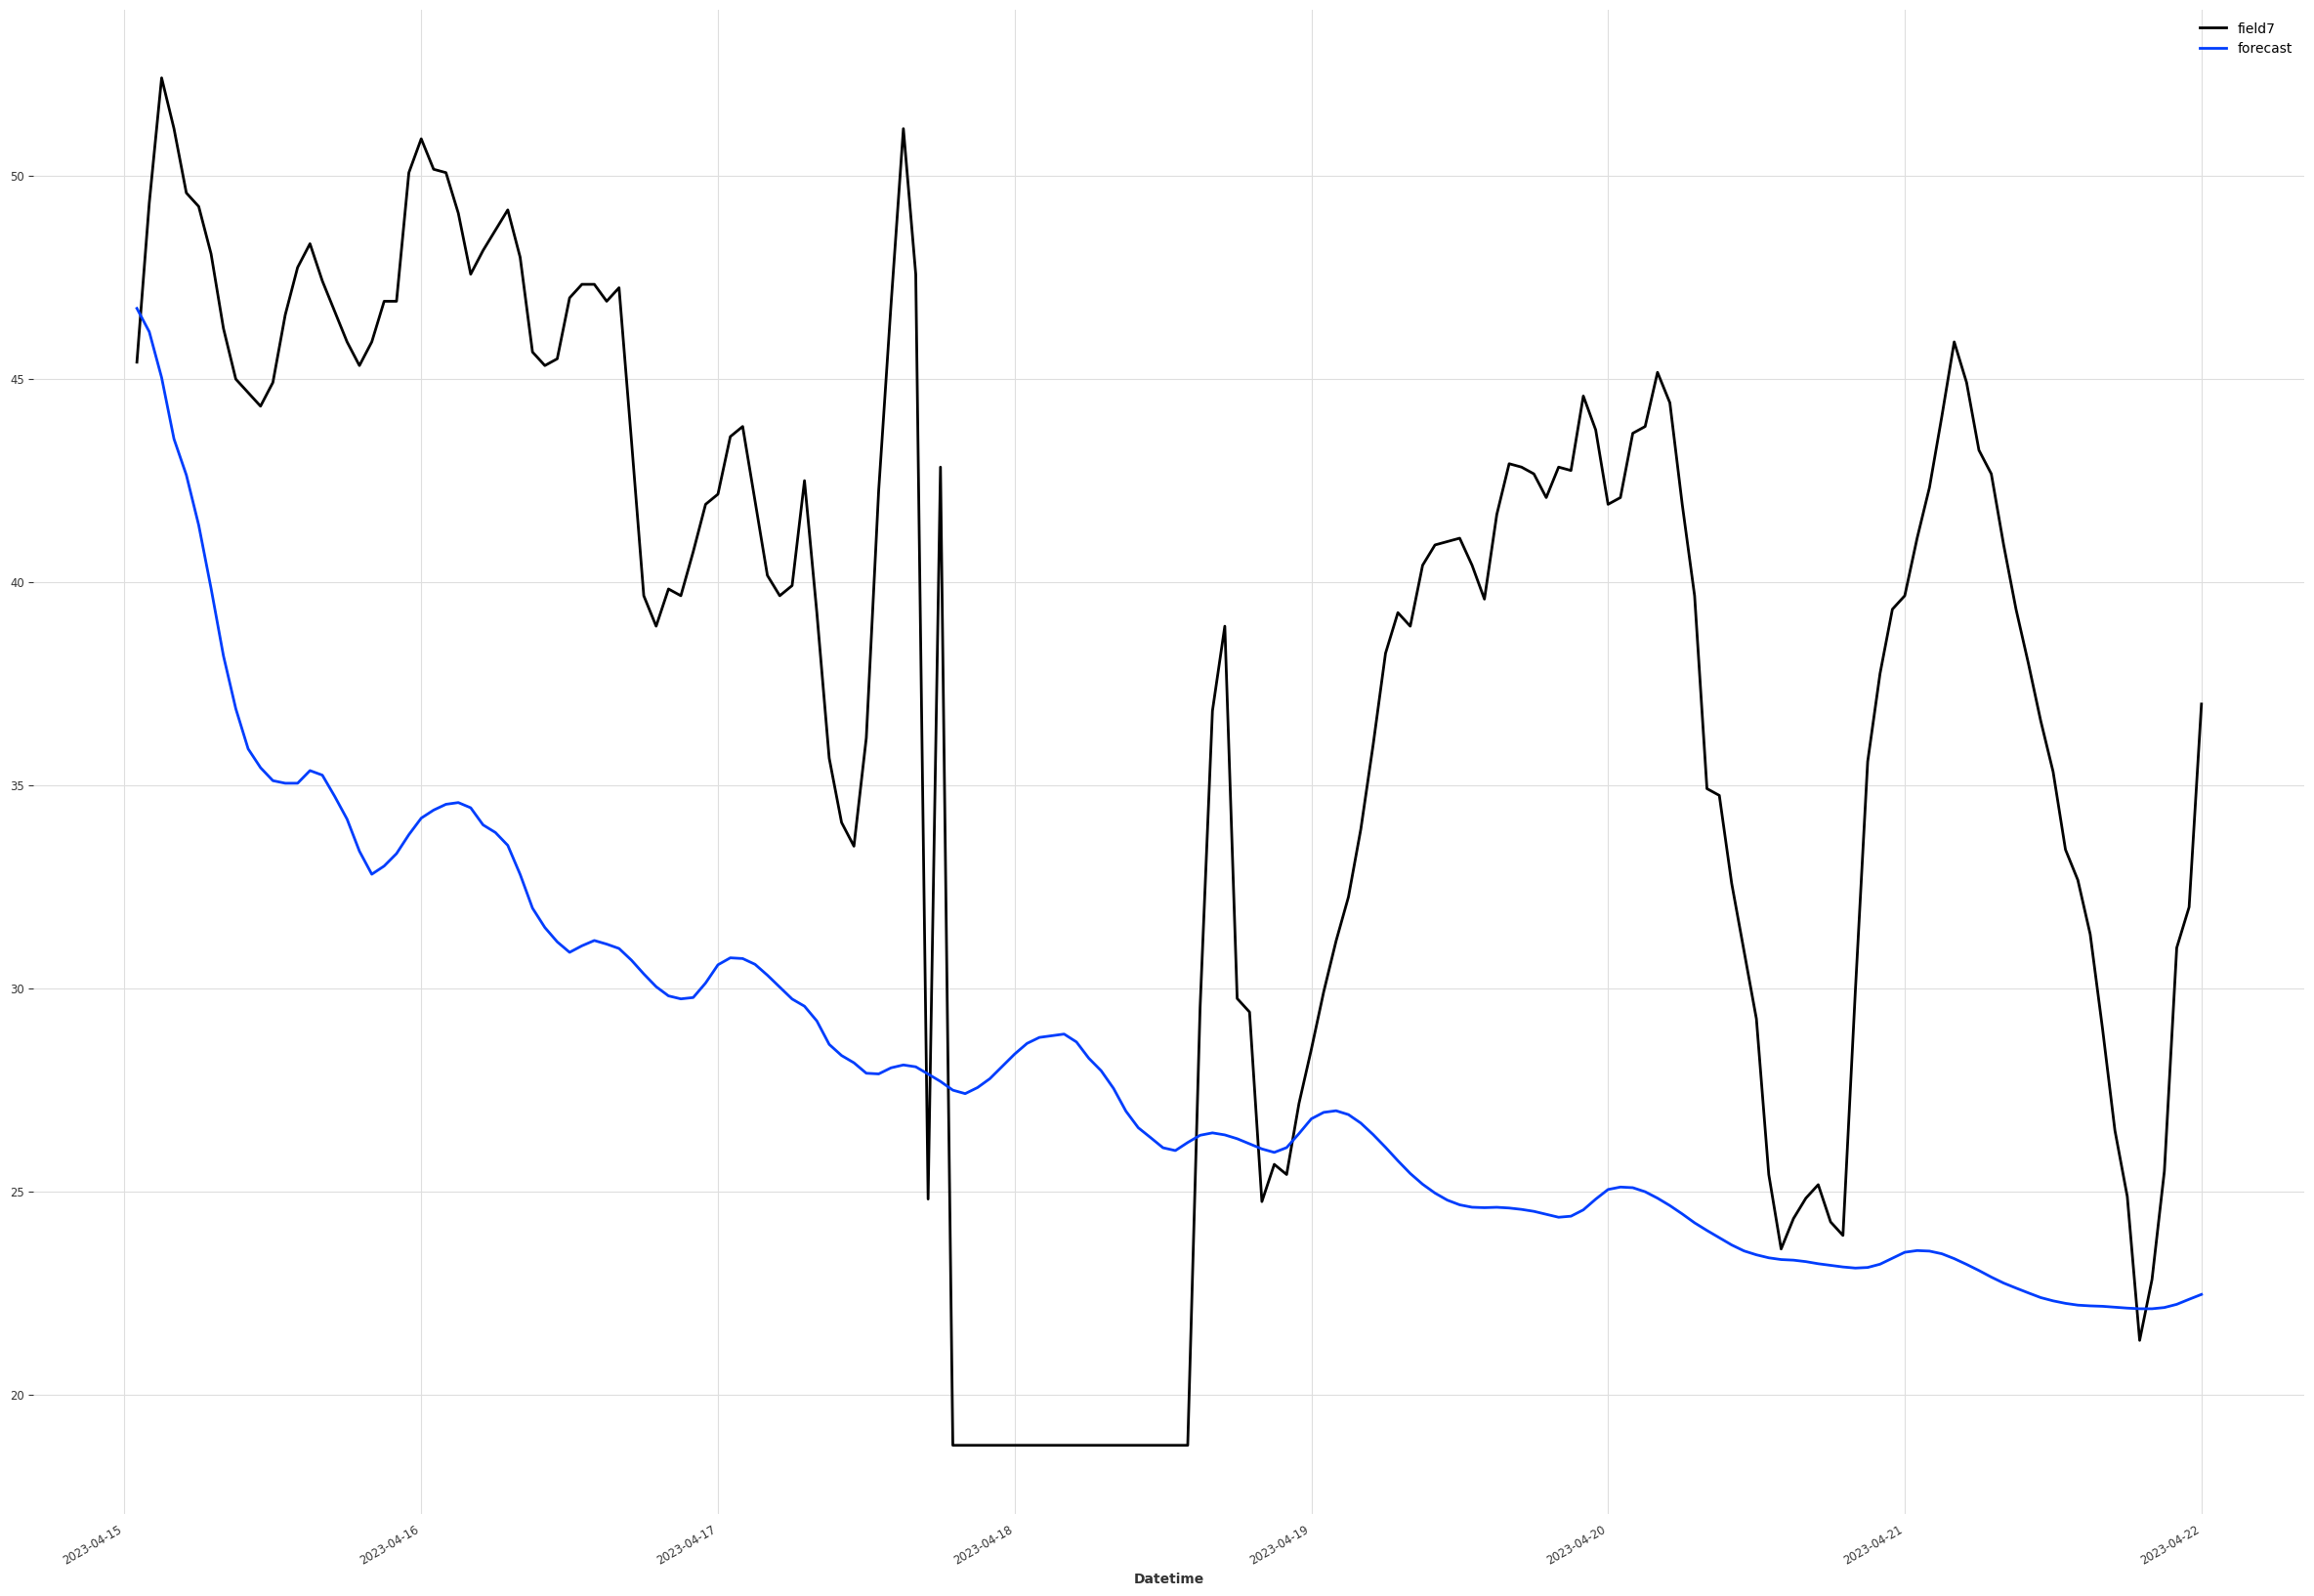

In [11]:
#mean_absolute_error(val,pred)
plt.rcParams['figure.figsize'] = [30, 20]
val7.plot()
predlrm7.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

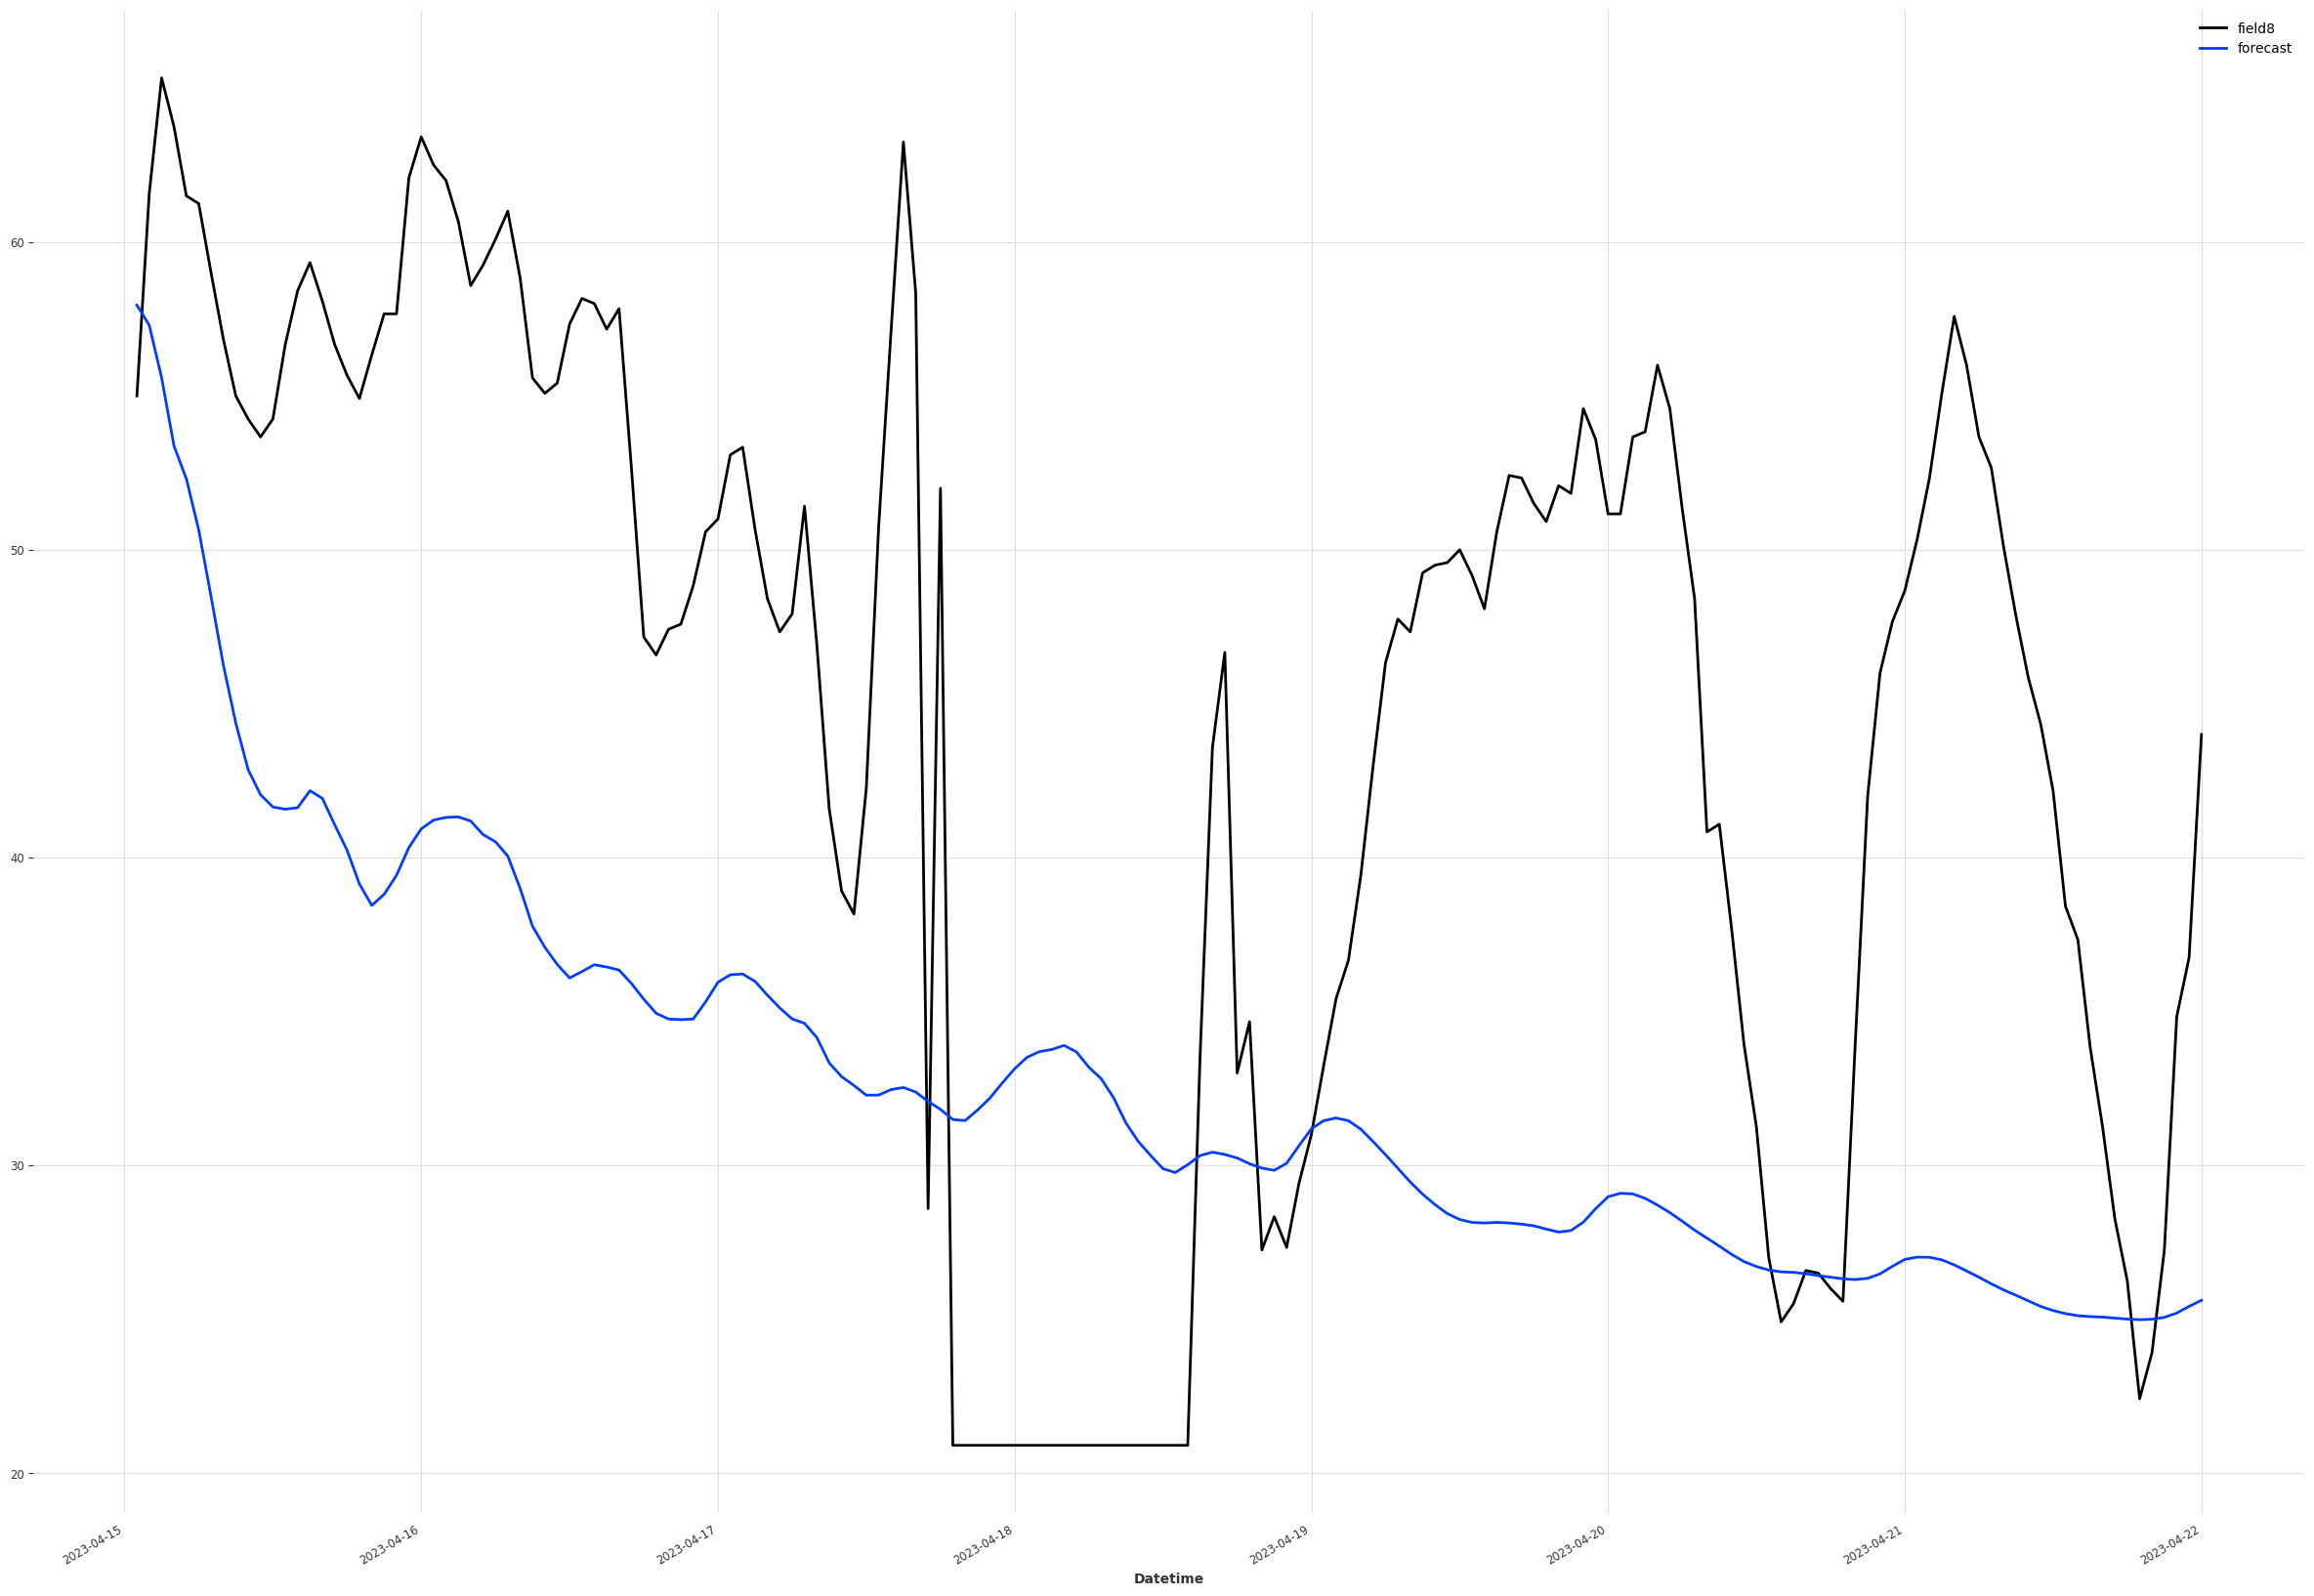

In [12]:
#mean_absolute_error(val,pred)
plt.rcParams['figure.figsize'] = [30, 20]
val8.plot()
predlrm8.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

In [13]:
df2.columns

Index(['Datetime', 'id', 'field1', 'field2', 'field3', 'field4', 'field5',
       'field6', 'field7', 'field8'],
      dtype='object')